Here we will use a Monte Carlo method to estimate ${\pi}$:

1. Generate a large number of uniformly random points (x, y) on [-1, 1].
2. Count the number of points that are contained within the unit circle centres on the origin (i.e., count the points with a distance from the origin of less than 1)

Let's look at this part visually:

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
x = []
y = []

for i in range(1000):
    x.append(np.random.uniform(-1,1))
    y.append(np.random.uniform(-1,1))

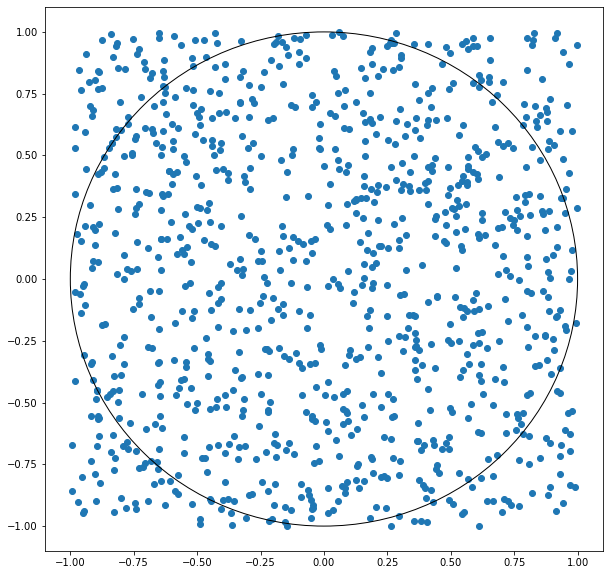

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
circle = plt.Circle((0,0), 
    radius=1.0,
    fill=False,
    color="black")

ax.add_patch(circle)
ax.scatter(x,y)

Now, notice that for a sufficiently large number of points:

\begin{equation}
\tag{1}
\frac{\text{area of the circle}}{\text{area of the square}}\approx
\frac{\text{points in the circle}}{\text{points in the square}}
\end{equation}

The area of a circle is ${\pi}r^2$ and the area of a square is $a^2$. Our square has a side length of 2 and our circle has a radius of 1. Therefore, we have:

\begin{equation}
\tag{2}
\frac{\pi}{4}\approx
\frac{\text{points in the circle}}{\text{points in the square}}
\end{equation}

\begin{equation}
\tag{3}
{\pi}\approx
\frac{\text{points in the circle}}{\text{points in the square}} {\text{ x 4}}
\end{equation}

So, to finish off our estimation of ${\pi}$:

3. Find the ratio of points inside the circle to the total points and multiply this value by 4.

For fun, we wil iterate through this process using a larger number of points for each iteration to see how our approximation converges.

In [51]:

def generate_points(num_points):
    x = []
    y = []

    for i in range(num_points):
        x.append(np.random.uniform(-1,1))
        y.append(np.random.uniform(-1,1))
    
    return np.array([x, y])

def estimate_pi(num_points):
    points = generate_points(num_points)
    dist = (points[0]**2 + points[1]**2)**(1/2)

    inside_circle = np.count_nonzero(dist < 1)
    
    return (inside_circle/num_points)*4

In [52]:
estimated_pi = []

for i in range(1000, 100000, 1000):
    estimated_pi.append(estimate_pi(i))

Text(0.5, 0, 'Interations')

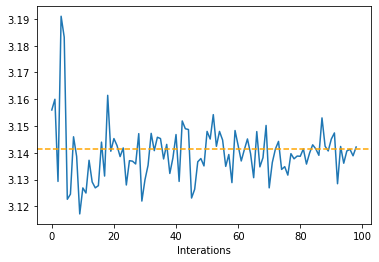

In [50]:
plt.plot(estimated_pi)
plt.axhline(np.pi,
    color='orange',
    linestyle="--")
plt.xlabel("Interations")